<a href="https://colab.research.google.com/github/Prathambiradr12345/Machine-_learning/blob/main/Lasso_regression(L2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#difference betwwn lasso vs ridge=in lasso used  absolute term(mse+lambda(||w||)),in ridge used square((mse+lambda(||w||*||w||)))
#key points

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

[28.69928779]
-2.2475625377490096


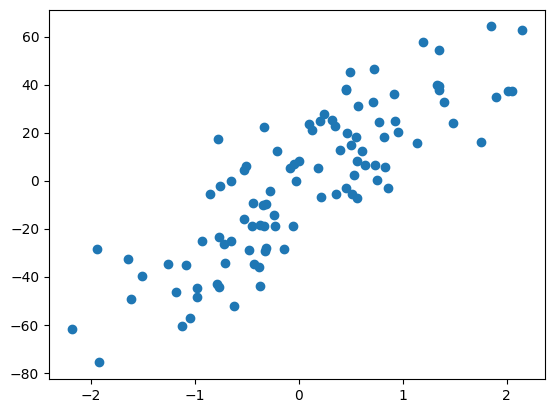

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
plt.scatter(X,y)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)#m
print(reg.intercept_)#b

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+04, tolerance: 8.004e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

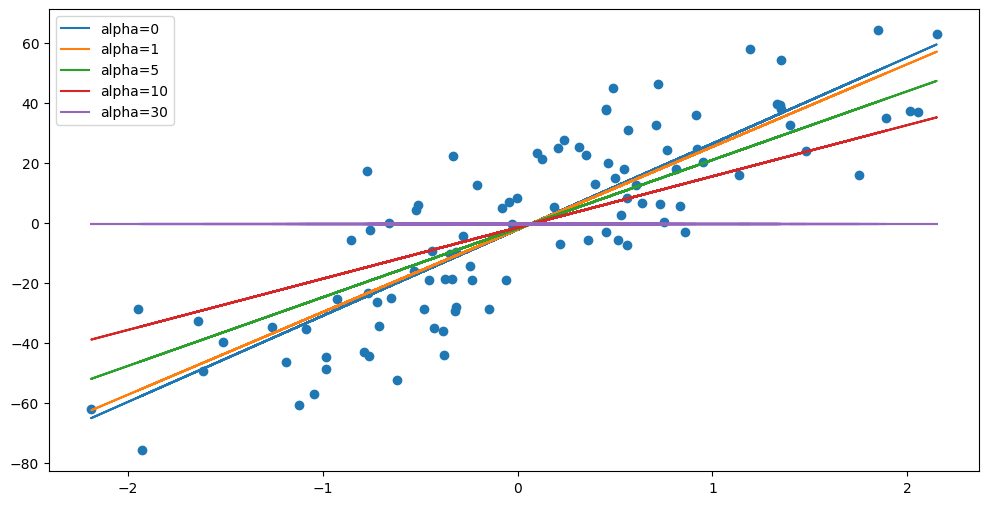

In [4]:
alphas=[0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
  l=Lasso(alpha=i)
  l.fit(X_train,y_train)
  plt.plot(X_train,l.predict(X_train),label=f'alpha={i}')
plt.legend()
plt.show()

In [5]:
#jab lambda ki value bada rahe ho tab coef is 0,dimesionality is decreses
#lasso used for high dimesional data.in data jo kam important hai use hata deta hai

In [6]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [7]:
data=load_diabetes()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [8]:
coefs=[]
r2_scores=[]
for i in [0,0,1,1,10]:
  reg=Lasso(alpha=i)
  reg.fit(X_train,y_train)
  coefs.append(reg.coef_.tolist())
  y_pred=reg.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+04, tolerance: 8.004e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

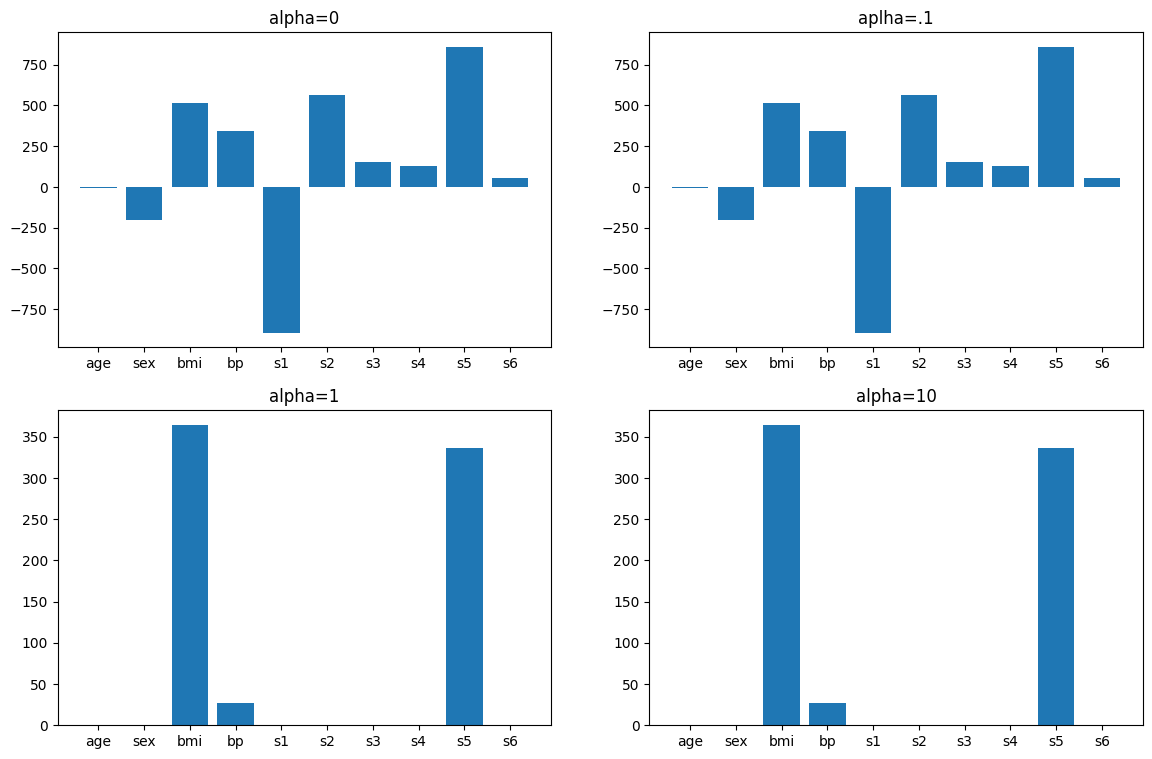

In [21]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('alpha=0')
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('aplha=.1')
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('alpha=1')
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('alpha=10')
plt.show()